# Explore here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
df = pd.read_csv('/workspaces/AK-EA-GG_ProyectoFinalDS-ML/data/loan_dataset.csv')

In [4]:
# Vista inicial
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras filas:")
display(df.head())

# Información sobre tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

Dimensiones del dataset: (396030, 27)

Primeras filas:


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 3942

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


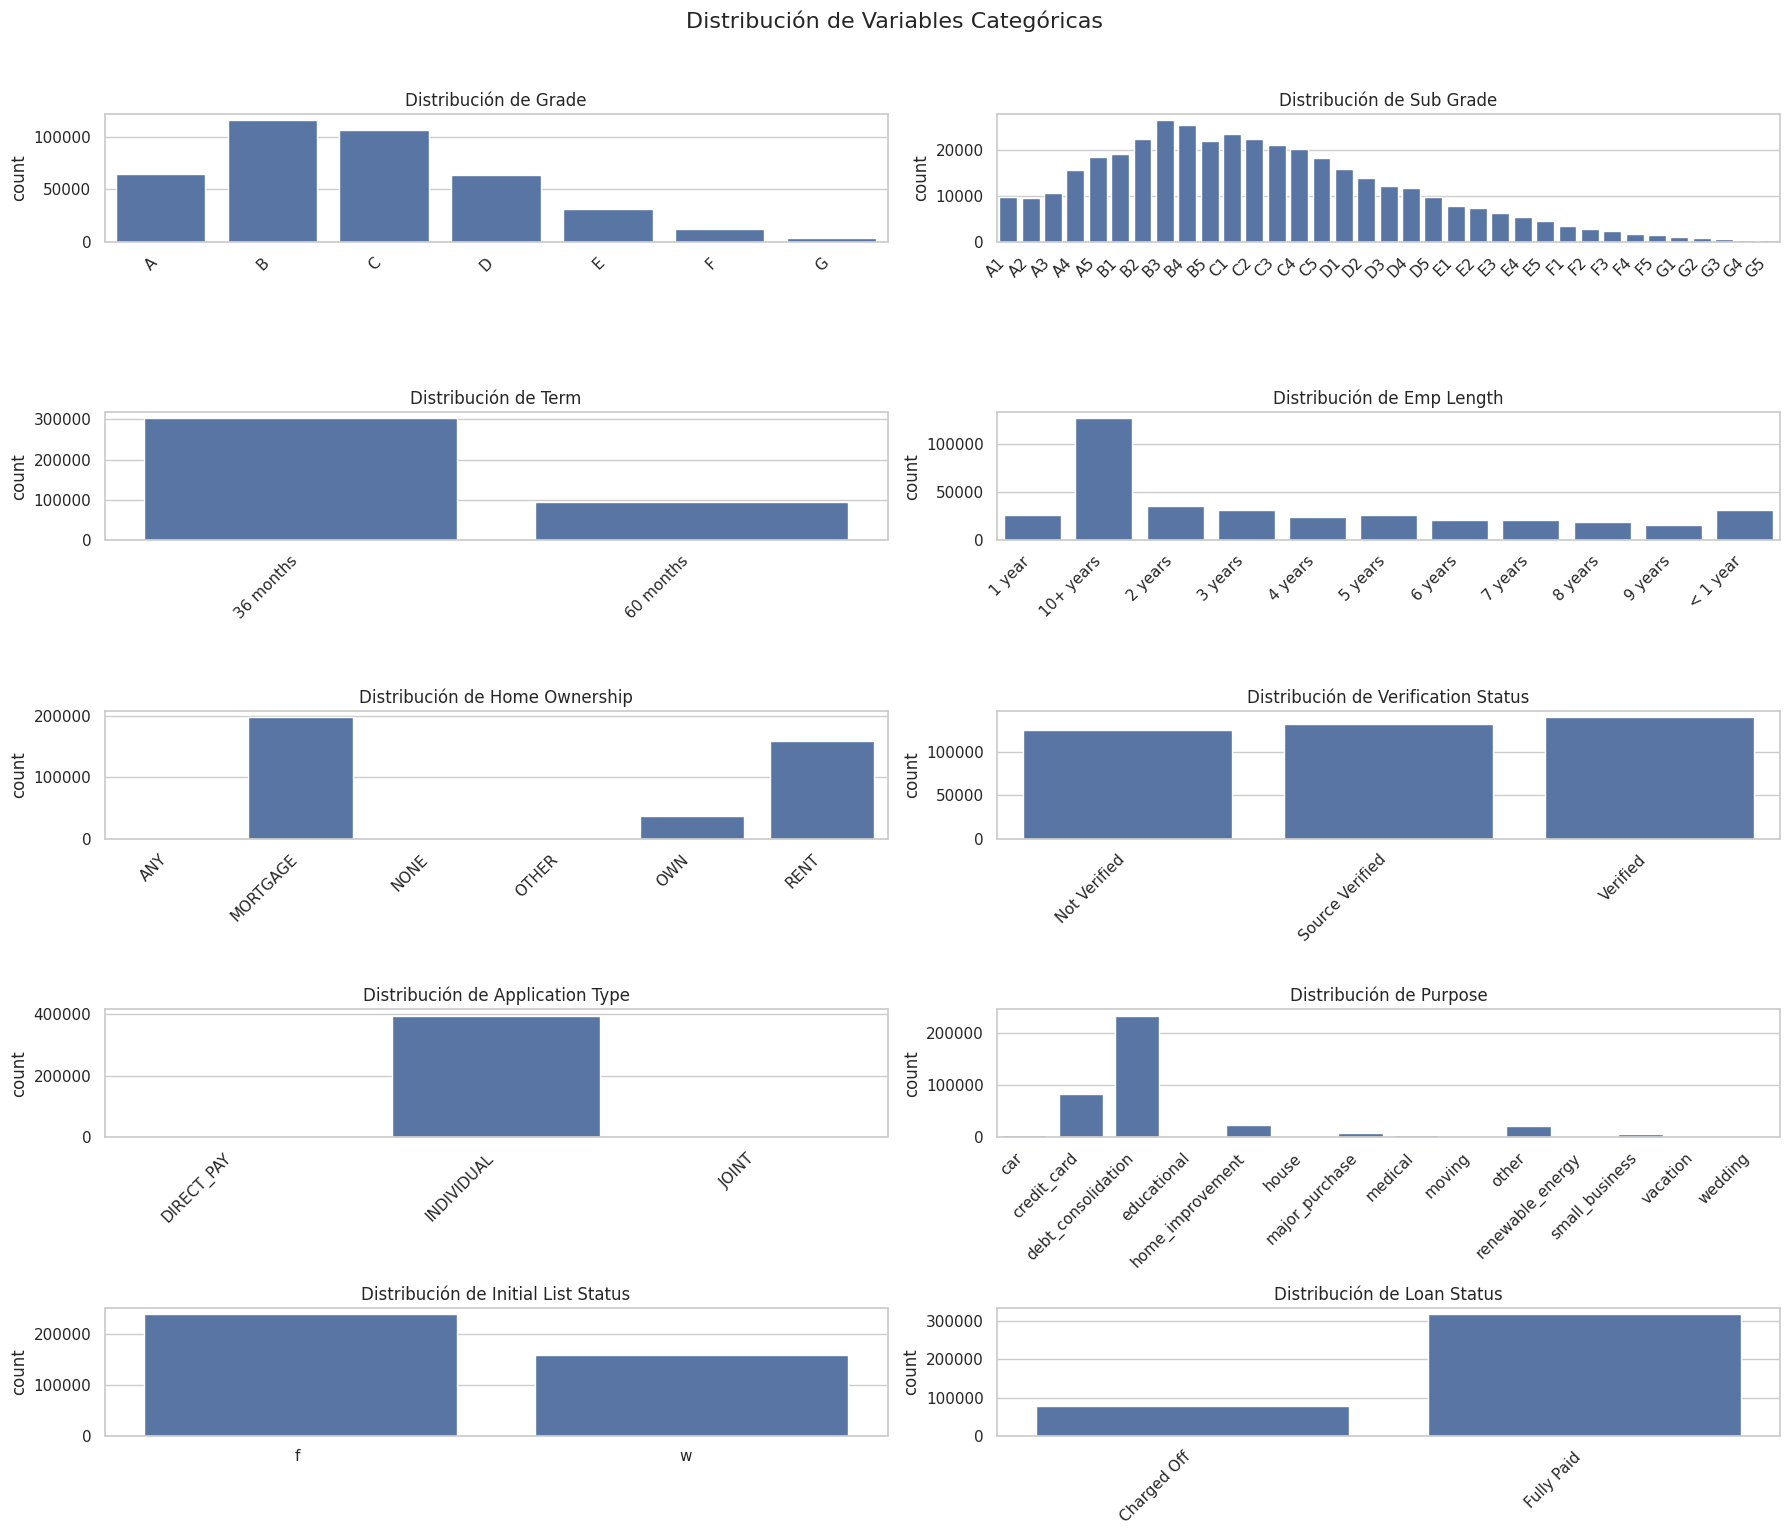

In [5]:
sns.set(style="whitegrid") 
plt.rcParams['font.size'] = 10 

fig, axes = plt.subplots(5, 2, figsize=(18, 15))
fig.suptitle('Distribución de Variables Categóricas', y=1.02, fontsize=16)

variables_cat = [
    "grade", "sub_grade", "term", "emp_length",
    "home_ownership", "verification_status", 
    "application_type", "purpose",
    "initial_list_status", "loan_status"
]

for ax, var in zip(axes.flatten(), variables_cat):
    order = sorted(df[var].dropna().unique())
    sns.countplot(ax=ax, data=df, x=var, order=order)
    ax.set_title(f'Distribución de {var.replace("_", " ").title()}')
    ax.set_xlabel('')
    
    if df[var].nunique() > 5 or any(len(str(x)) > 4 for x in df[var].unique()):
        ax.tick_params(axis='x', rotation=45)
    
    plt.setp(ax.get_xticklabels(), ha="right")

plt.tight_layout()
plt.show()

In [6]:
# conversion de variables categóricas por mascara

dict_loan_status={"Fully Paid":0, "Charged Off":1}
dict_initial_list_status = {"W":0, "f":1}
dict_emp_length = {"< 1 year":0, "1 year ":1, 
                   "2 years":2, "3 years":3, 
                   "4 years":4, "5 years":5, 
                   "6 years":6, "7 years":7, 
                   "8 years":8, "9 years":9, 
                   "10+ years":10}

df["loan_status"] = df["loan_status"].map(dict_loan_status)
df["initial_list_status"] = df["initial_list_status"].map(dict_initial_list_status)
df["emp_length"] = df["emp_length"].map(dict_emp_length)

In [7]:
# conversion de term con split y numeric
df['term'] = df['term'].str.split().str[0]
df['term'] = pd.to_numeric(df['term'])

In [8]:
# extraccion de state de la columna address
df['state'] = df['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}')

In [9]:
# conversion de issue_d a datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# separar columnas en month y year
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

In [10]:
# dropeo de columnas innecesarias

df = df.drop("grade", axis=1)
df = df.drop("title", axis=1)
df = df.drop("earliest_cr_line", axis=1)
df = df.drop("application_type", axis=1)
df = df.drop("address", axis=1)
df = df.drop("issue_d", axis=1)
df = df.drop("emp_title", axis=1)

In [11]:
# conversion de variables categóricas a numéricas por label encoding

# Inicializar el LabelEncoder
le = LabelEncoder()
#le_state = LabelEncoder()
#le_purpose = LabelEncoder()

# Aplicar el encoder a la columnas
df['sub_grade'] = le.fit_transform(df['sub_grade'])
#df['state'] = le_state.fit_transform(df['state'])
#df['purpose'] = le_purpose.fit_transform(df['purpose'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  int64  
 5   emp_length            351847 non-null  float64
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   loan_status           396030 non-null  int64  
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [13]:
#apliacion del one hot encoding a las variables categóricas restantes

# Columnas categóricas
columnas_categoricas = ["home_ownership", "verification_status", "state", "purpose"]

# Inicializar el encoder
encoder = OneHotEncoder(
    sparse_output=False,  # Devuelve un array denso (no sparse)
    drop="first"  # Similar a drop_first en pandas
)

# Aplicar one-hot encoding
encoded_data = encoder.fit_transform(df[columnas_categoricas])

# Convertir a DataFrame y asignar nombres de columnas
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(columnas_categoricas)
)

# Concatenar con el DataFrame original (eliminando las columnas originales)
df_final = pd.concat([
    df.drop(columnas_categoricas, axis=1),
    encoded_df
], axis=1)

# Mostrar resultado
pd.set_option('display.max_columns', None)
df_final.head()


,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_nan,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,8,10.0,117000.0,0,26.24,16.0,0.0,36369.0,41.8,25.0,NaN,0.0,0.0,1,2015,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8000.0,36,11.99,265.68,9,4.0,65000.0,0,22.05,17.0,0.0,20131.0,53.3,27.0,1.0,3.0,0.0,1,2015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,506.97,7,0.0,43057.0,0,12.79,13.0,0.0,11987.0,92.2,26.0,1.0,0.0,0.0,1,2015,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,220.65,1,6.0,54000.0,0,2.60,6.0,0.0,5472.0,21.5,13.0,1.0,0.0,0.0,11,2014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,609.33,14,9.0,55000.0,1,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,1.0,0.0,4,2013,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 90 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   sub_grade                            396030 non-null  int64  
 5   emp_length                           351847 non-null  float64
 6   annual_inc                           396030 non-null  float64
 7   loan_status                          396030 non-null  int64  
 8   dti                                  396030 non-null  float64
 9   open_acc                             396030 non-null  float64
 10  pub_rec                              396030 non-null  float64
 11  revol_bal    

In [15]:
# Seleccionar columnas numéricas
numericas_float = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'mort_acc', 'pub_rec_bankruptcies'
]

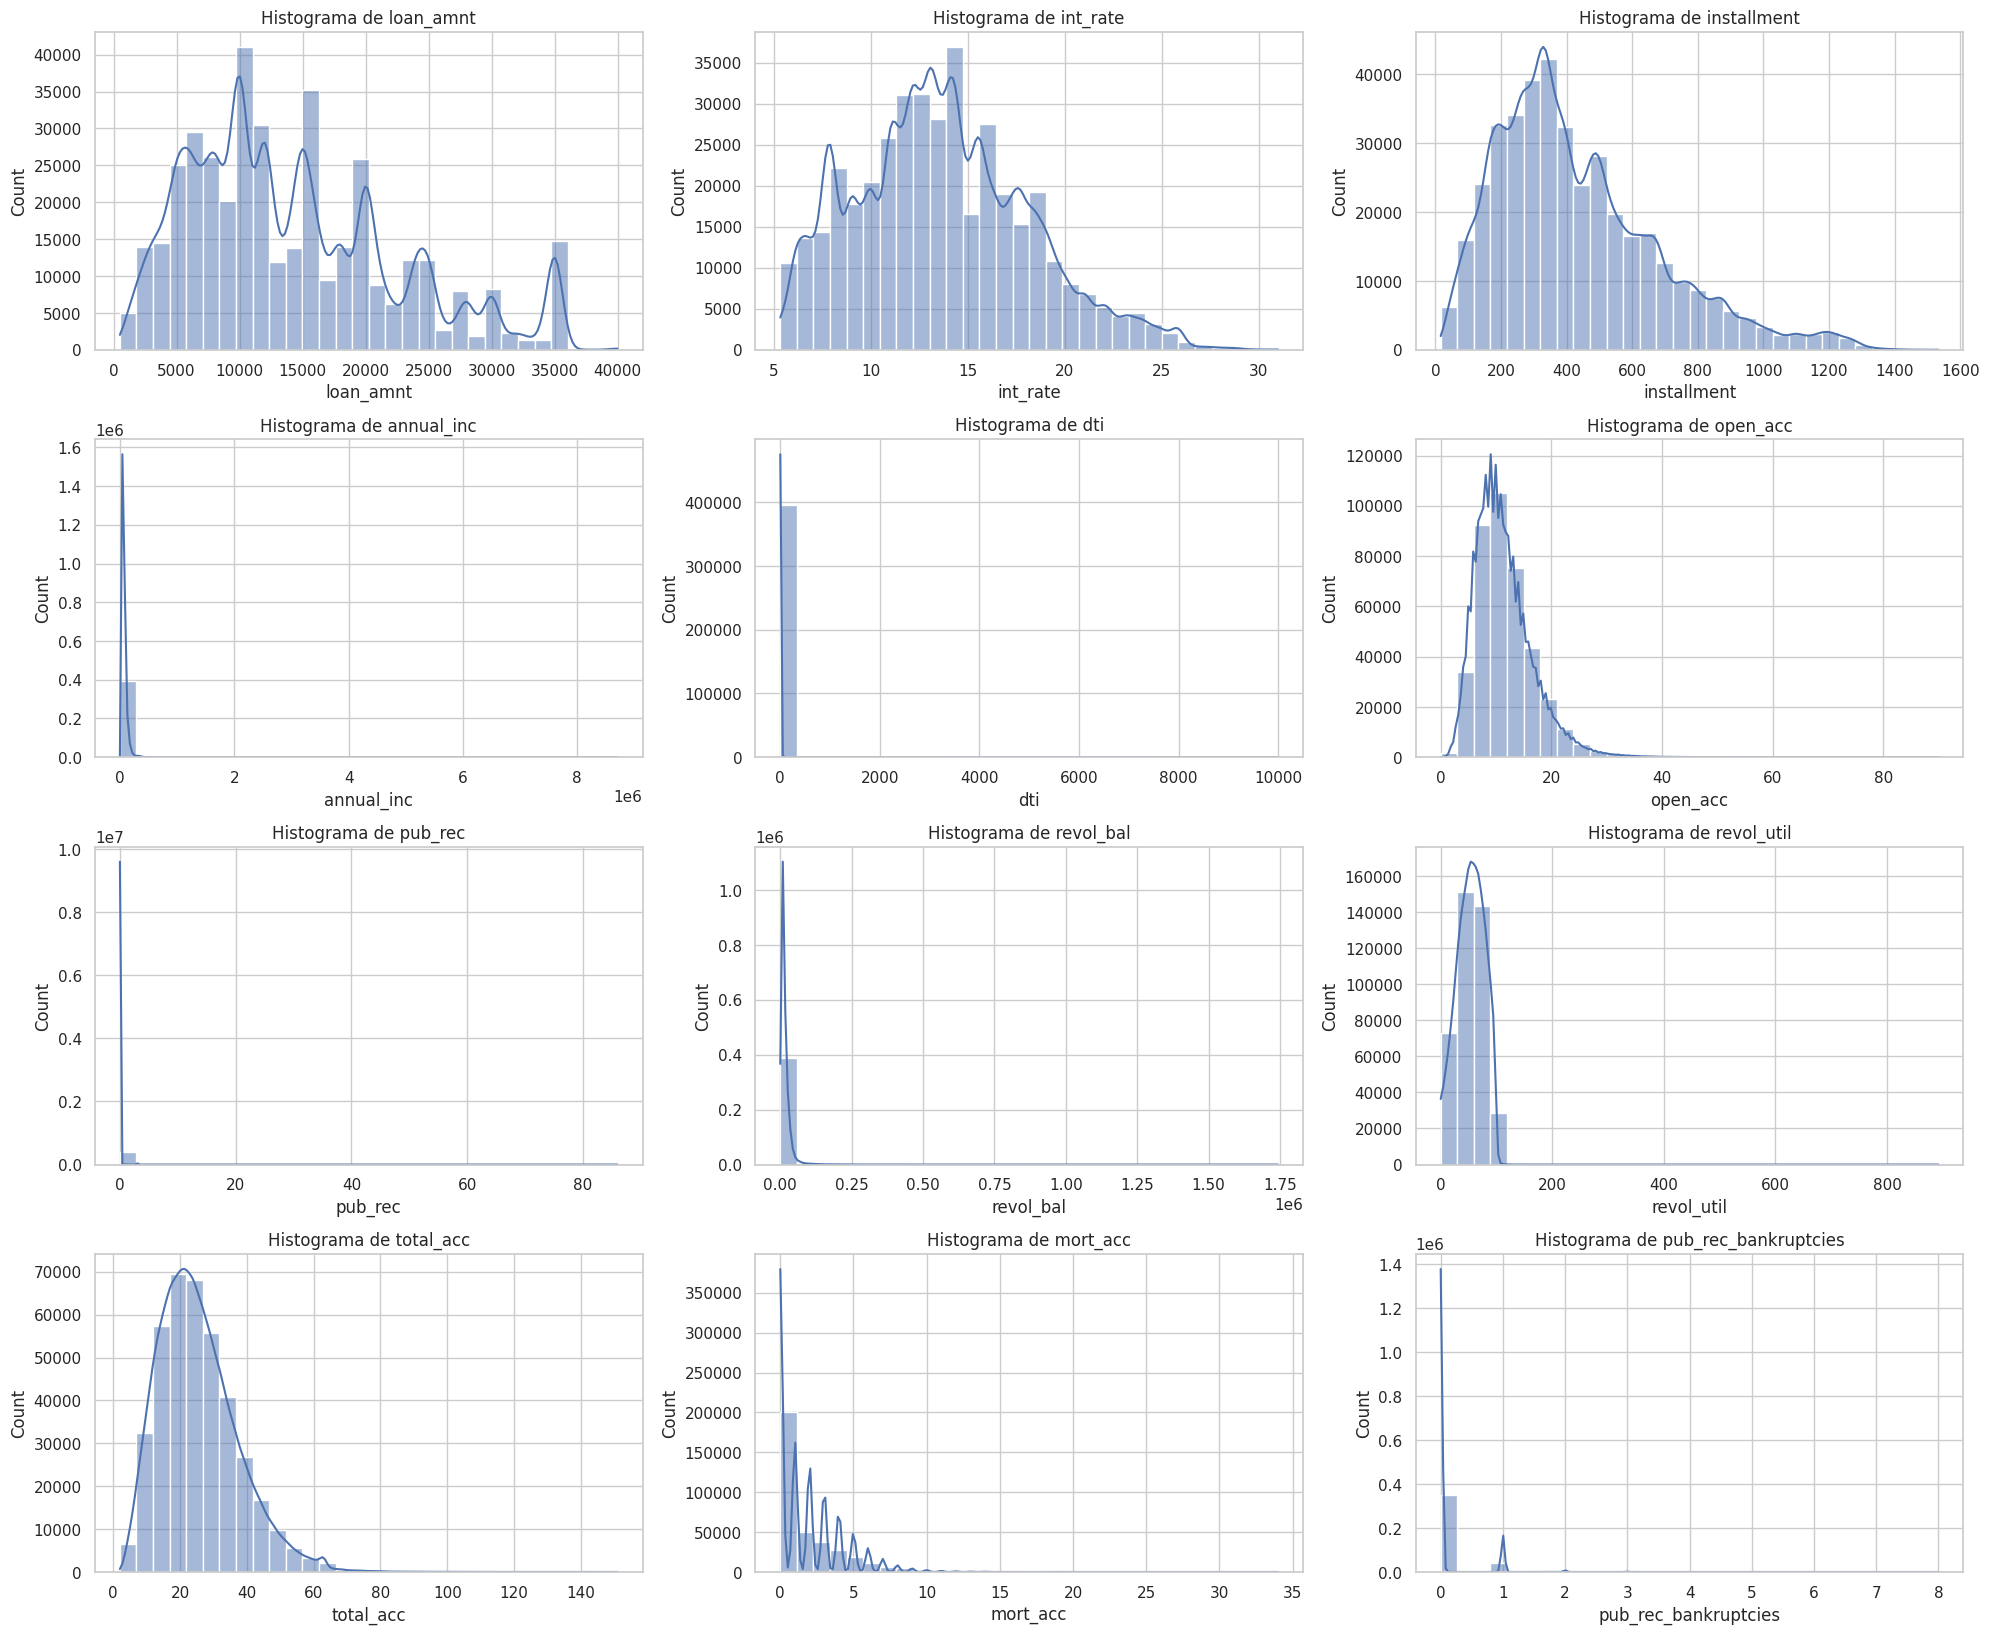

In [16]:
# Histograma de variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

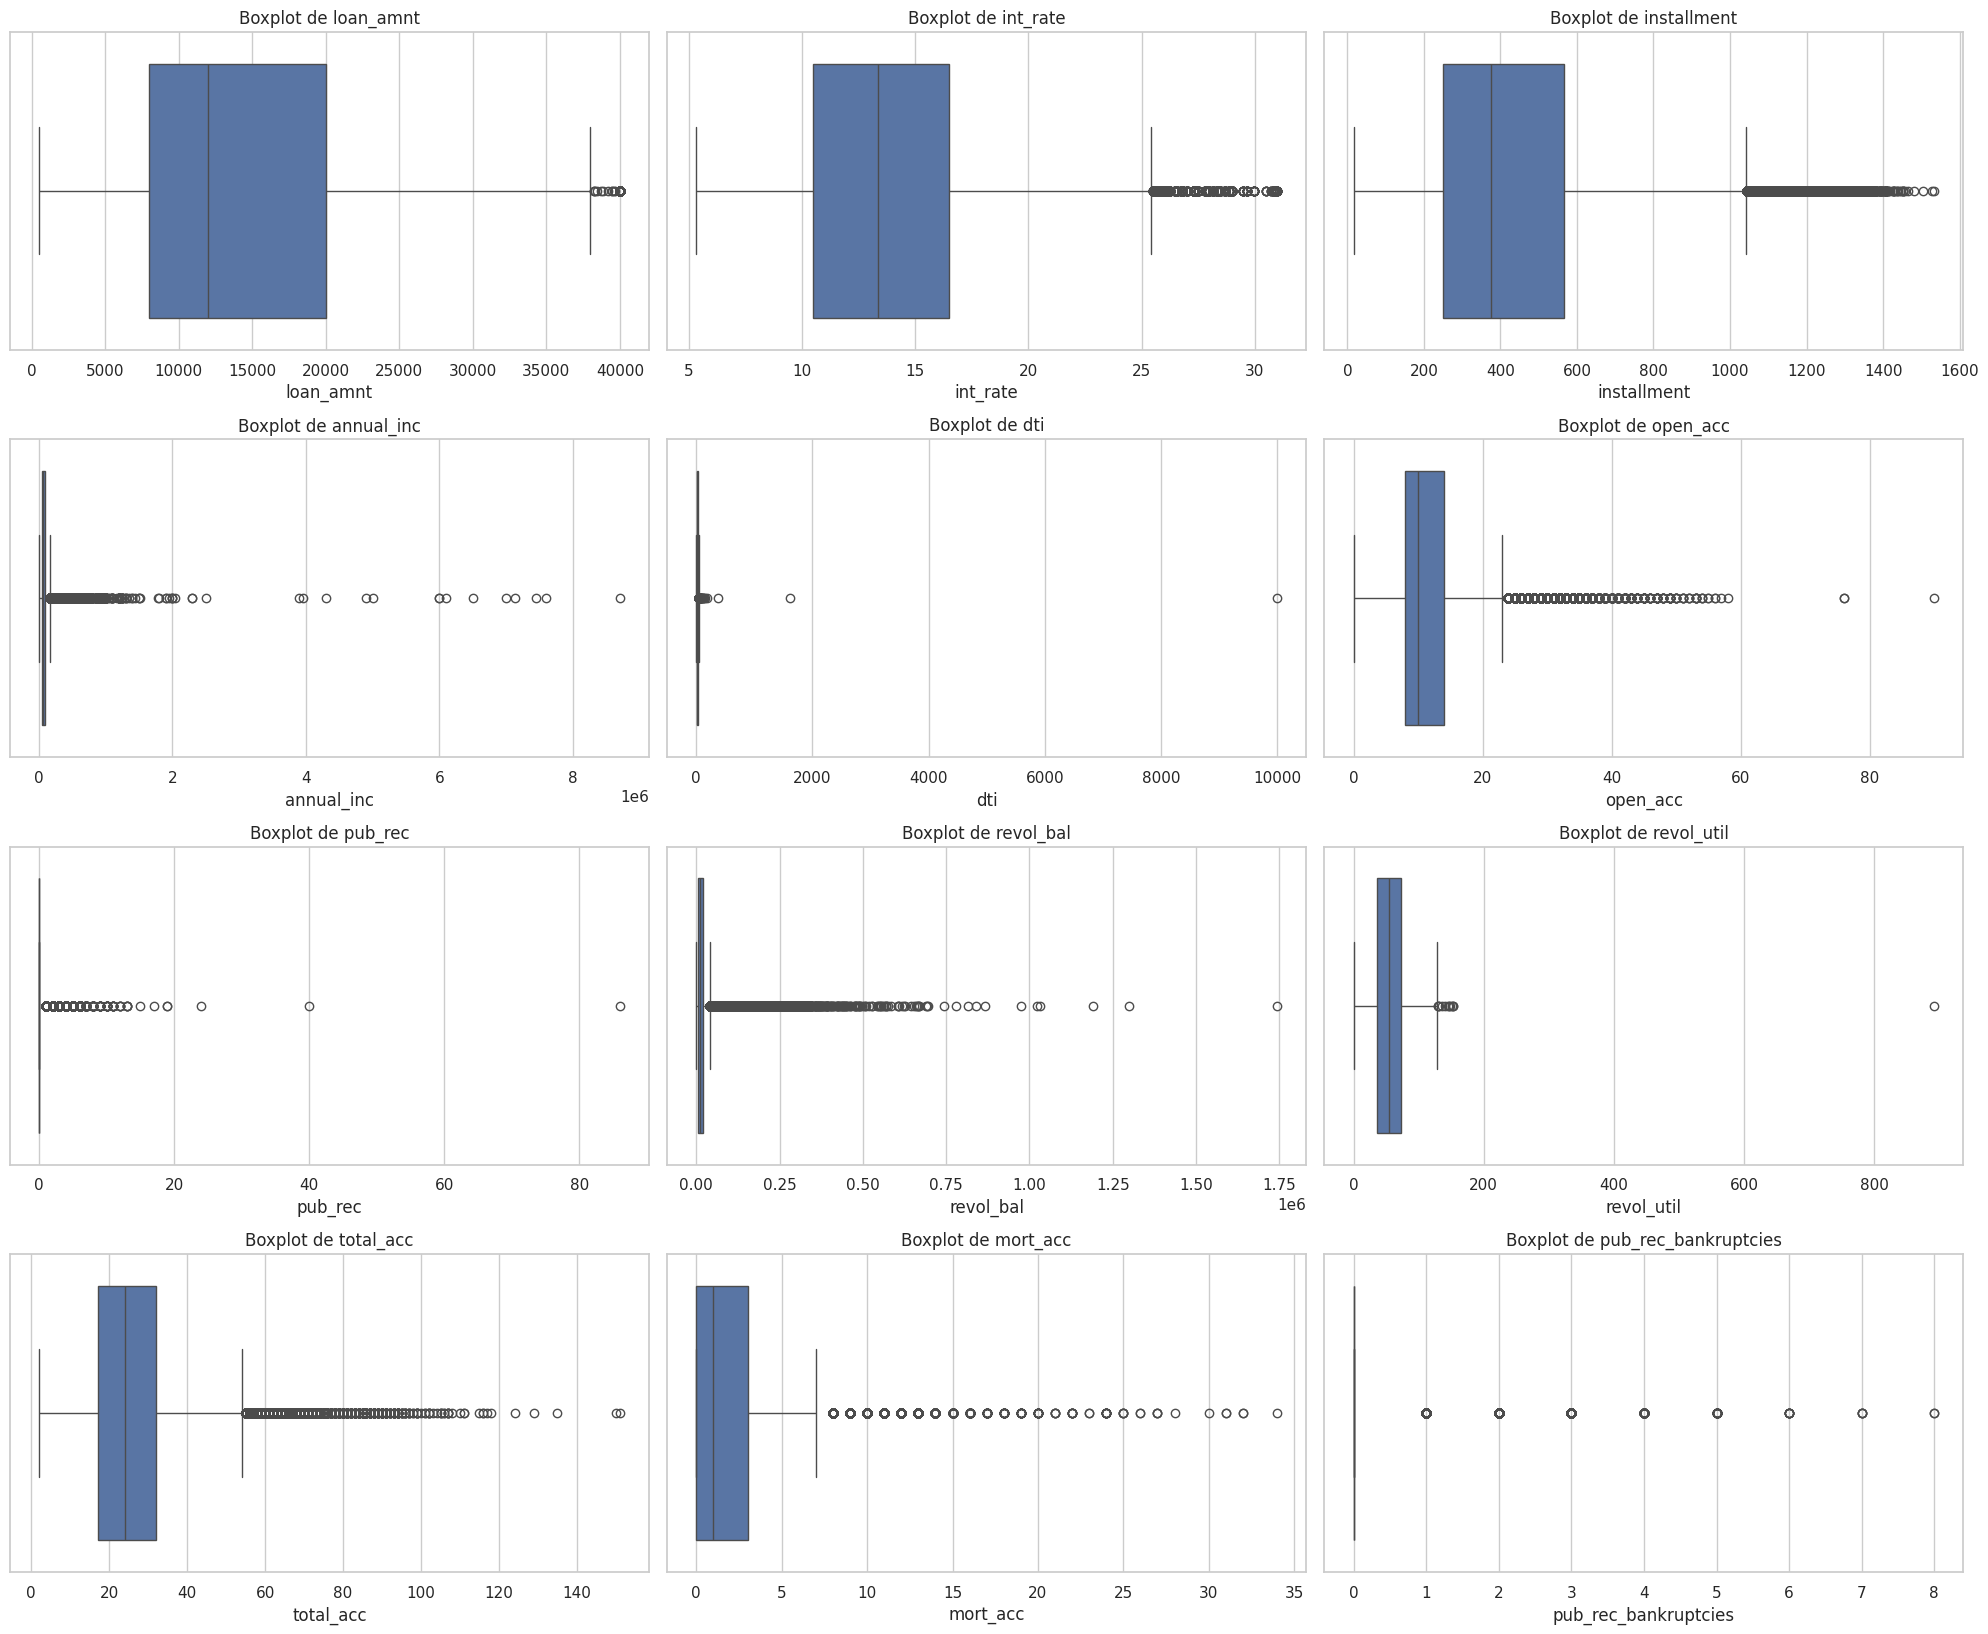

In [17]:
# Boxplots para las variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

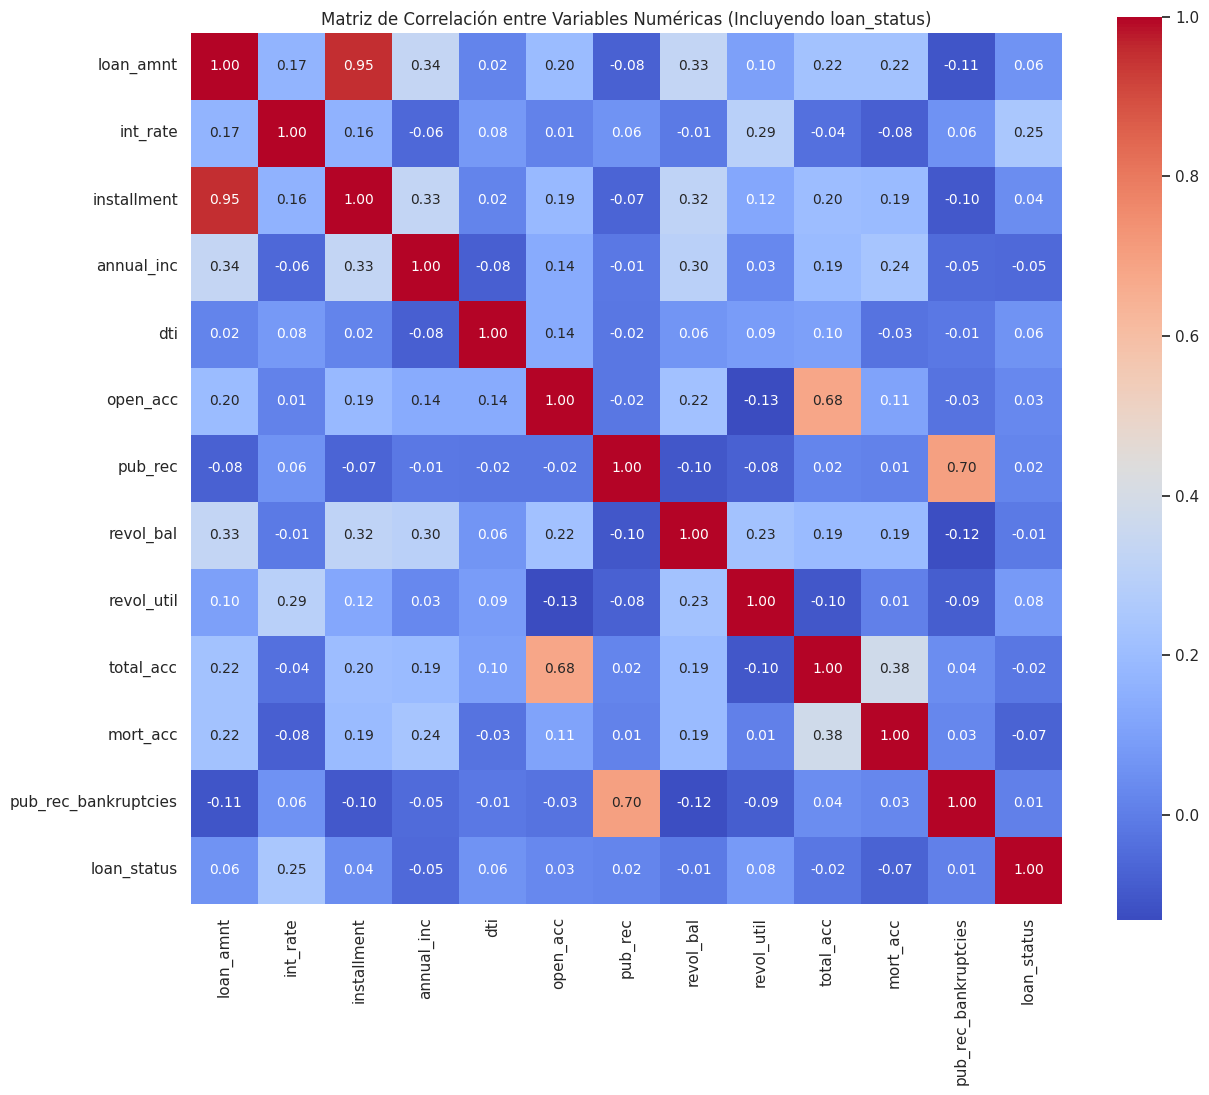

In [18]:
# Relación entre variables numéricas (float64 + loan_status)
# Agregar la variable objetivo a la lista
numericas_float_con_objetivo = numericas_float + ['loan_status']

# Calcular la matriz de correlación incluyendo la variable objetivo
corr_matrix = df_final[numericas_float_con_objetivo].corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación entre Variables Numéricas (Incluyendo loan_status)')
plt.tight_layout()
plt.show()

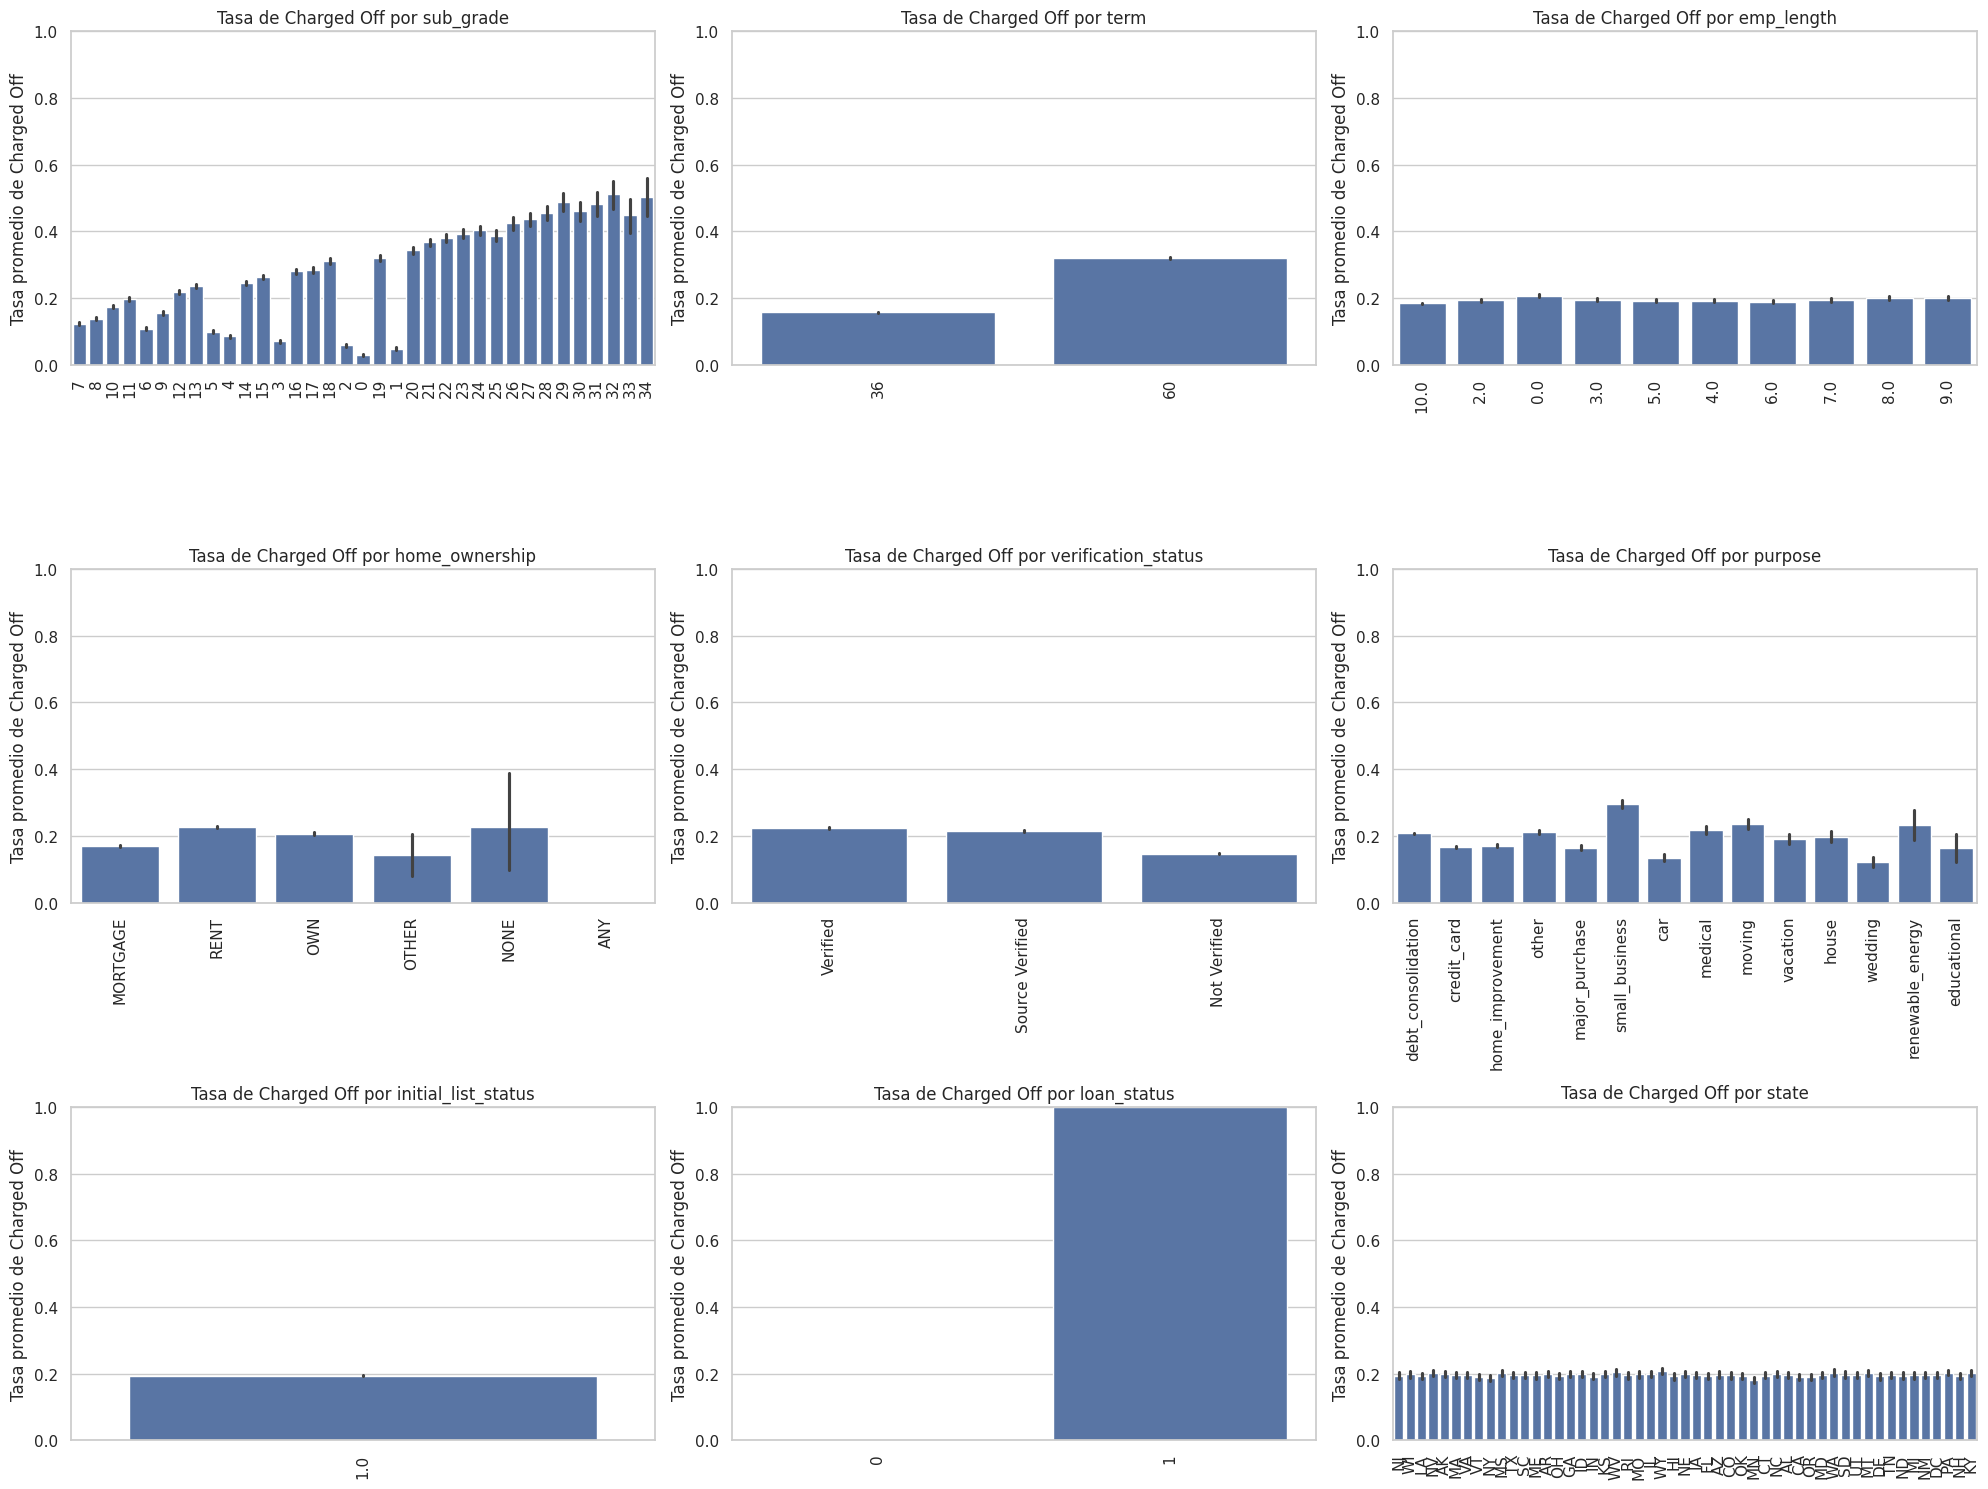

In [ ]:
# Relación entre variables categóricas y la variable objetivo

# Usamos el DataFrame original antes del one-hot establecido como `df`

# Lista de variables categóricas originales

cat_vars = [
    "sub_grade", "term", "emp_length",
    "home_ownership", "verification_status", "purpose",
    "initial_list_status", "state"
]

# Graficar proporción de Charged Off por categoría
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_vars):
    plt.subplot(3, 3, i + 1)
    orden = df[col].value_counts().index
    sns.barplot(data=df, x=col, y="loan_status", order=orden)
    plt.xticks(rotation=90)
    plt.title(f'Tasa de Charged Off por {col}')
    plt.ylabel('Tasa promedio de Charged Off')
    plt.xlabel('')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

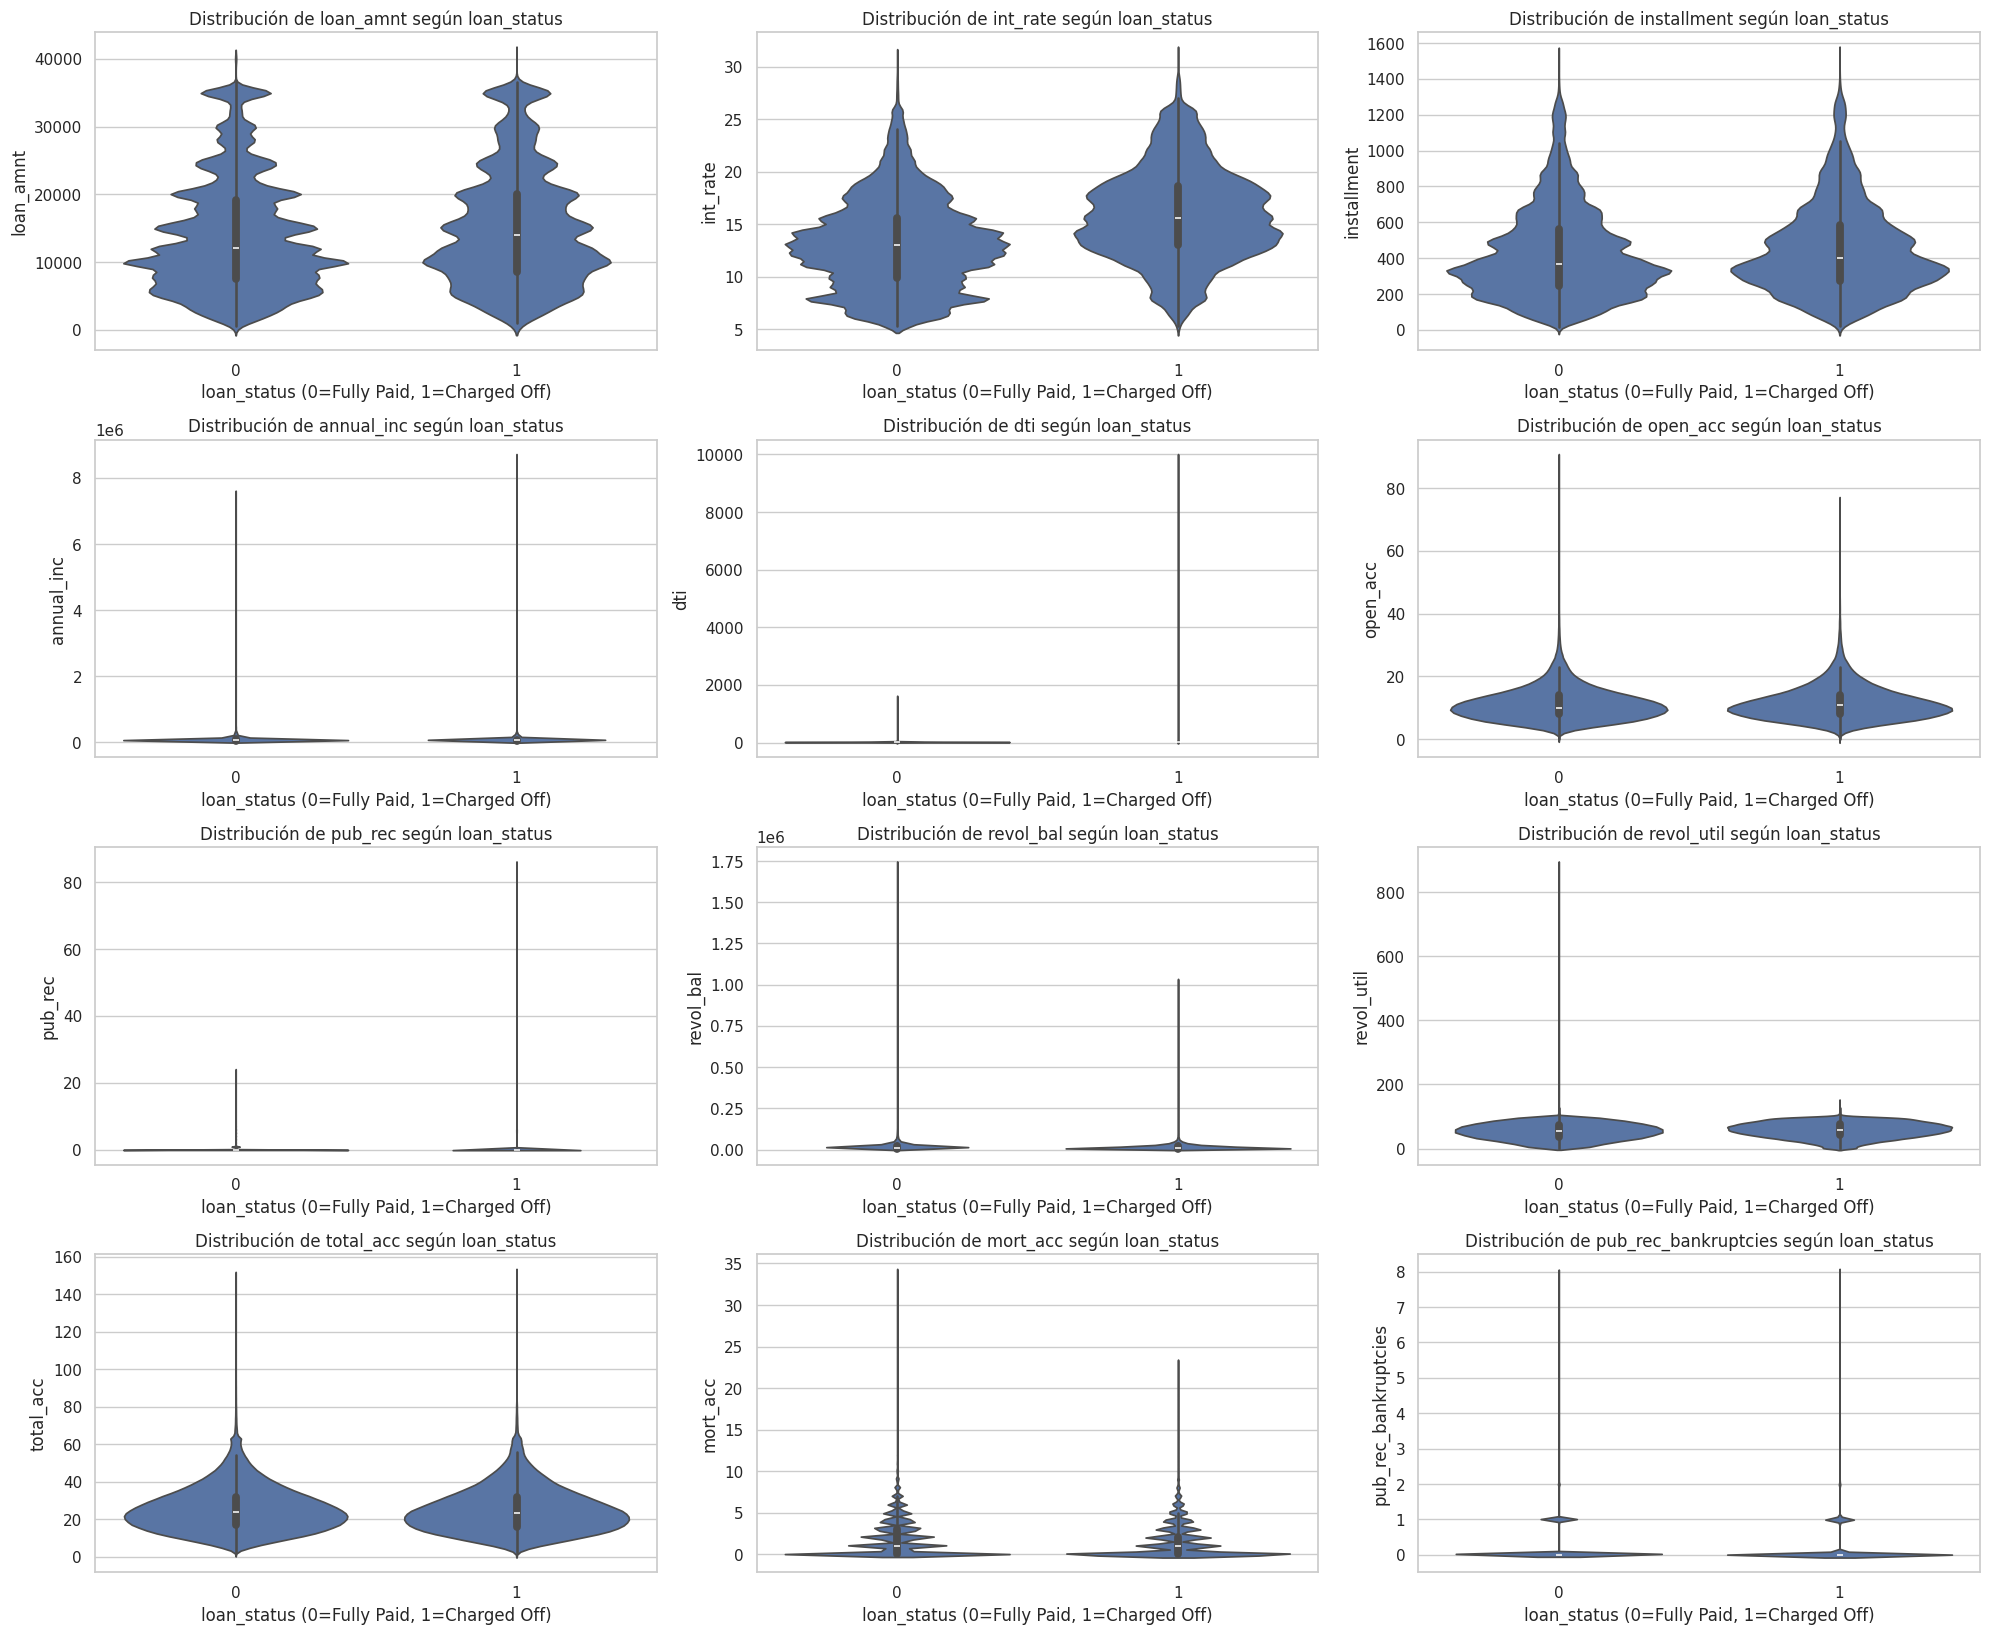

In [20]:
# Distribución de variables numéricas según loan_status
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.violinplot(data=df_final, x='loan_status', y=col, inner='box')
    plt.title(f'Distribución de {col} según loan_status')
    plt.xlabel('loan_status (0=Fully Paid, 1=Charged Off)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()